### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import random

import numpy as np
import pandas as pd
import torch
from torch import nn

In [ ]:
# %conda install wget

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2024-11-28 00:16:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [          <=>       ] 201.24M   104MB/s    in 1.9s    

2024-11-28 00:16:32 (104 MB/s) - ‘data.txt.zip’ saved [211011981]



In [3]:
df = pd.read_csv("data.txt.zip", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [25]:
df.shape

(515345, 91)

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

In [ ]:
constant = [y_train.mean()] * len(y_test) # среднее значение целевой переменной
rmse_constant = root_mean_squared_error(y_test, constant)
print(f'RMSE при наилучшем константном прогнозе: {rmse_constant}')

RMSE при наилучшем константном прогнозе: 10.85246390513634


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
for a in np.arange(0.1,10.1,2.5):
    regressor = Ridge(alpha=a)
    regressor.fit(X_train_scaled, y_train)

    ypred = regressor.predict(X_test_scaled)

    print(f'alpha = {a}')
    print('RMSE:', root_mean_squared_error(y_test, ypred))

alpha = 0.1
RMSE: 9.510160718781293
alpha = 2.6
RMSE: 9.510161001496071
alpha = 5.1
RMSE: 9.510161284976174
alpha = 7.6
RMSE: 9.510161569221415


In [ ]:
# оптимальное альфа по кросс валидации
n_alphas = 200
ridge_alphas = np.logspace(0, 6, n_alphas)

ridge_cv = RidgeCV(fit_intercept=False, gcv_mode='svd', alphas=ridge_alphas,
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

print(f'Best alpha: {ridge_cv.alpha_}')


Best alpha: 1.0


In [ ]:
# learning
regressor1 = Ridge(alpha=ridge_cv.alpha_)

regressor1.fit(X_train_scaled, y_train)

ypred1_train = regressor1.predict(X_train_scaled)
ypred1_test = regressor1.predict(X_test_scaled)

print(f'train RMSE: {root_mean_squared_error(y_train, ypred1_train)}\ntest RMSE: {root_mean_squared_error(y_test, ypred1_test)}')

train RMSE: 9.552822967970322
test RMSE: 9.510160820470436


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [6]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [ ]:
train_set = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
train_loader = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

test_set = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
test_loader = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

model = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
optimizer = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
criterion = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader):
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    raise NotImplementedError


def test(model, criterion, test_loader):
    """
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

In [ ]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

## Эксперимент 1

In [8]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F  # содержит различные функции активации и не только
import torch.optim as optim # здесь реализованы градиентные спуски
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
import tqdm

In [7]:
set_random_seed(42) # seed LOCKED !!!!!!!!!!!!

In [9]:
def plot(histories): # скопировала эту функцию из семинарской тетрадки..
    plt.figure(figsize=(16,10))

    for name, val_loss in histories:
        plt.plot(val_loss, label=name)

    plt.legend()

In [11]:
# сначала взяла просто числа, которые мне нравятся (ну и потому что в данных 90 столбцов), и lr которая лучше всего работала в прошлой домашке
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-2
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
def create_data_loader(X_train, y_train, X_test, y_test): # трейнлоадер создает из датасета итератор
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train, dtype=torch.float32))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True) # чтобы батчи не повторялись на трейне

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test, dtype=torch.float32))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [12]:
train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

In [ ]:
class FirstModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.out(x))
        return x

In [18]:
def run_train(model, optimizer, criterion, scheduler=None):
    train_loss_values = []
    valid_loss_values = []

    for epoch in range(EPOCHS):
        model.train()
        running_loss = []

        # прогресс-бар
        progress_bar = tqdm.tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}', leave=False)

        for features, label in progress_bar:
            optimizer.zero_grad()

            output = model(features)
            label = label.float().unsqueeze(1)

            loss = torch.sqrt(criterion(output, label))
            loss.backward()

            optimizer.step()

            running_loss.append(loss.item())

            # прогресс-бар апдейт
            progress_bar.set_postfix(train_loss=np.mean(running_loss))

        train_loss_values.append(np.mean(running_loss))

        # validation
        model.eval()
        running_val_loss = []
        with torch.no_grad():
            for features, label in test_loader:
                output = model(features)
                label = label.float().unsqueeze(1)

                loss = torch.sqrt(criterion(output, label))
                running_val_loss.append(loss.item())

        valid_loss_values.append(np.mean(running_val_loss))

        progress_bar.set_postfix(train_loss=train_loss_values[-1], valid_loss=valid_loss_values[-1])

        if epoch % 5 == 0:
            print(f'EPOCH {epoch}, train_loss: {train_loss_values[-1]}, valid_loss: {valid_loss_values[-1]}')

        if scheduler is not None:
            scheduler.step()

    return train_loss_values, valid_loss_values

In [ ]:
model1 = FirstModel()

# инициализируем SGD optimizer
sgd = optim.SGD(model1.parameters(), lr=LEARNING_RATE)

# инициализируем функцию потерь
criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values = run_train(model1, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 1997.4172053389727, valid_loss: 1997.4943297735535


EPOCH 5, train_loss: 1997.4164360669538, valid_loss: 1997.4943297735535


EPOCH 10, train_loss: 1997.4162060735505, valid_loss: 1997.4943297735535


EPOCH 15, train_loss: 1997.4162086335239, valid_loss: 1997.4943297735535


EPOCH 20, train_loss: 1997.4165023567923, valid_loss: 1997.4943297735535


EPOCH 25, train_loss: 1997.415088510408, valid_loss: 1997.4943297735535


EPOCH 30, train_loss: 1997.416127859625, valid_loss: 1997.4943297735535


EPOCH 35, train_loss: 1997.41538182947, valid_loss: 1997.4943297735535


EPOCH 40, train_loss: 1997.4159555329918, valid_loss: 1997.4943297735535


EPOCH 45, train_loss: 1997.4162414416046, valid_loss: 1997.4943297735535


EPOCH 50, train_loss: 1997.415332920504, valid_loss: 1997.4943297735535


EPOCH 55, train_loss: 1997.415442729891, valid_loss: 1997.4943297735535


EPOCH 60, train_loss: 1997.416593370585, valid_loss: 1997.4943297735535


EPOCH 65, train_loss: 1997.4159478530714, valid_loss: 1997.4943297735535


EPOCH 70, train_loss: 1997.415932493231, valid_loss: 1997.4943297735535


EPOCH 75, train_loss: 1997.4165070051652, valid_loss: 1997.4943297735535


EPOCH 80, train_loss: 1997.4161207860143, valid_loss: 1997.4943297735535


EPOCH 85, train_loss: 1997.416105358806, valid_loss: 1997.4943297735535


EPOCH 90, train_loss: 1997.4154770874293, valid_loss: 1997.4943297735535


EPOCH 95, train_loss: 1997.416484302243, valid_loss: 1997.4943297735535


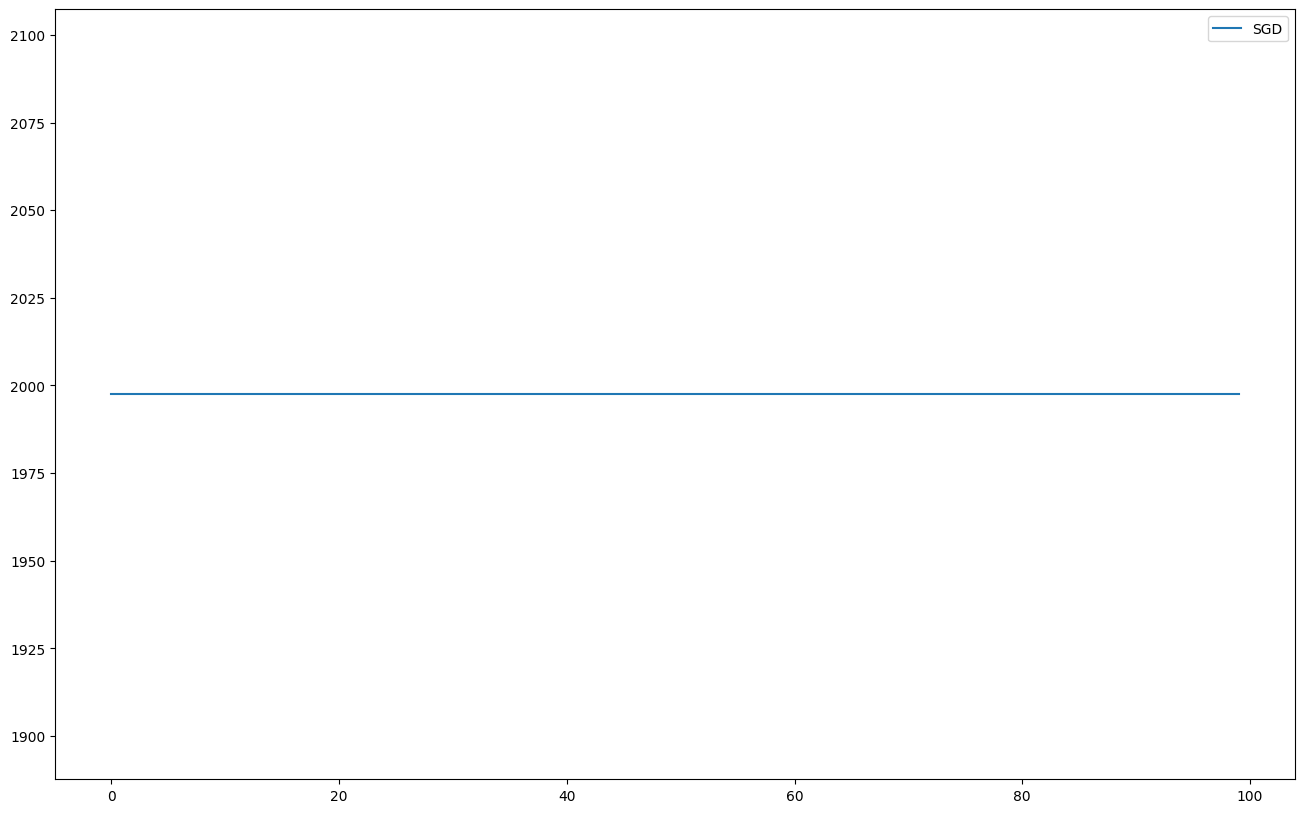

In [ ]:
plot([('SGD', valid_loss_values)]) # ЭТО ТРЕШ................... что я наделала

## Эксперимент 2

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-2
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
# применим StandardScaler к тренировочным и тестовым данным
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# передаём scaled данные в DataLoader
train_loader, test_loader = create_data_loader(X_train_scaled, y_train, X_test_scaled, y_test)

In [14]:
print(X_train_scaled.mean(axis=0), X_train_scaled.std(axis=0)) # смотрю как они выглядят

[-2.24130138e-15  1.22582661e-18  6.53365586e-17 -6.58881805e-18
 -1.14553497e-16 -8.33562098e-17  3.37102319e-18 -5.38137884e-17
  1.45321745e-16  3.94103257e-17 -1.48325020e-17 -9.50934996e-17
 -4.53678430e-16  7.82445128e-16 -2.96282293e-16  9.48176886e-17
 -4.75314270e-17  1.45873367e-16  8.25471642e-16  2.90061223e-16
  4.76294931e-16 -3.48012176e-16  8.75240203e-17  1.26873055e-16
  7.25689356e-17 -7.30899119e-18 -2.38423277e-17 -3.07376024e-17
  2.11455091e-18 -7.60012501e-18 -1.83873992e-19 -4.00232390e-17
 -1.60736515e-17  2.34132883e-17  4.65814114e-18 -1.98400038e-16
  2.85311145e-17 -8.91788862e-18  5.52234890e-17  7.72270767e-18
 -7.10979436e-18 -6.60720545e-17 -6.68075505e-17  2.94198388e-18
 -4.07587349e-18 -3.34650666e-17 -1.18598725e-17 -2.76577130e-16
  1.44647541e-17 -3.95941997e-17 -1.05421089e-17 -1.43912045e-16
  3.51199325e-17 -9.37757360e-18  7.02092194e-17  4.68265767e-17
  1.26873055e-17 -2.07164698e-17 -4.59684980e-17  4.26587662e-17
 -2.78875555e-18  4.78072

In [ ]:
class SecondModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        x = self.dropout2(x)
        x = self.out(x)
        return x

In [ ]:
model2 = SecondModel()

sgd = optim.SGD(model2.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values2 = run_train(model2, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 520.0508663438541, valid_loss: 155.88529775638392


EPOCH 5, train_loss: 153.20600029648534, valid_loss: 15.53818120578728


EPOCH 10, train_loss: 150.94734513996454, valid_loss: 31.06206258452765


EPOCH 15, train_loss: 150.65656171887127, valid_loss: 16.02542810156794


EPOCH 20, train_loss: 148.1535502722195, valid_loss: 15.397071158531869


EPOCH 25, train_loss: 146.10692953063426, valid_loss: 18.13081475059585


EPOCH 30, train_loss: 145.36756900341044, valid_loss: 21.358208486349277


EPOCH 35, train_loss: 144.84937339429035, valid_loss: 16.324541818977583


EPOCH 40, train_loss: 144.4057378368925, valid_loss: 11.975839652637443


EPOCH 45, train_loss: 143.9179463754953, valid_loss: 13.91197140382068


EPOCH 50, train_loss: 143.56114002253045, valid_loss: 14.702104337144606


EPOCH 55, train_loss: 142.78910996056024, valid_loss: 18.48149306703322


EPOCH 60, train_loss: 142.11166099312553, valid_loss: 12.74249806734595


EPOCH 65, train_loss: 141.7471459075052, valid_loss: 11.859375915905037


EPOCH 70, train_loss: 141.75394513380712, valid_loss: 18.18181582252578


EPOCH 75, train_loss: 140.78687410165142, valid_loss: 13.77680766228402


EPOCH 80, train_loss: 140.3070223810394, valid_loss: 12.383720558468658


EPOCH 85, train_loss: 139.88134609416093, valid_loss: 17.431525381484835


EPOCH 90, train_loss: 139.2282255690619, valid_loss: 13.213982237447606


EPOCH 95, train_loss: 138.76798000293587, valid_loss: 15.232203832947382


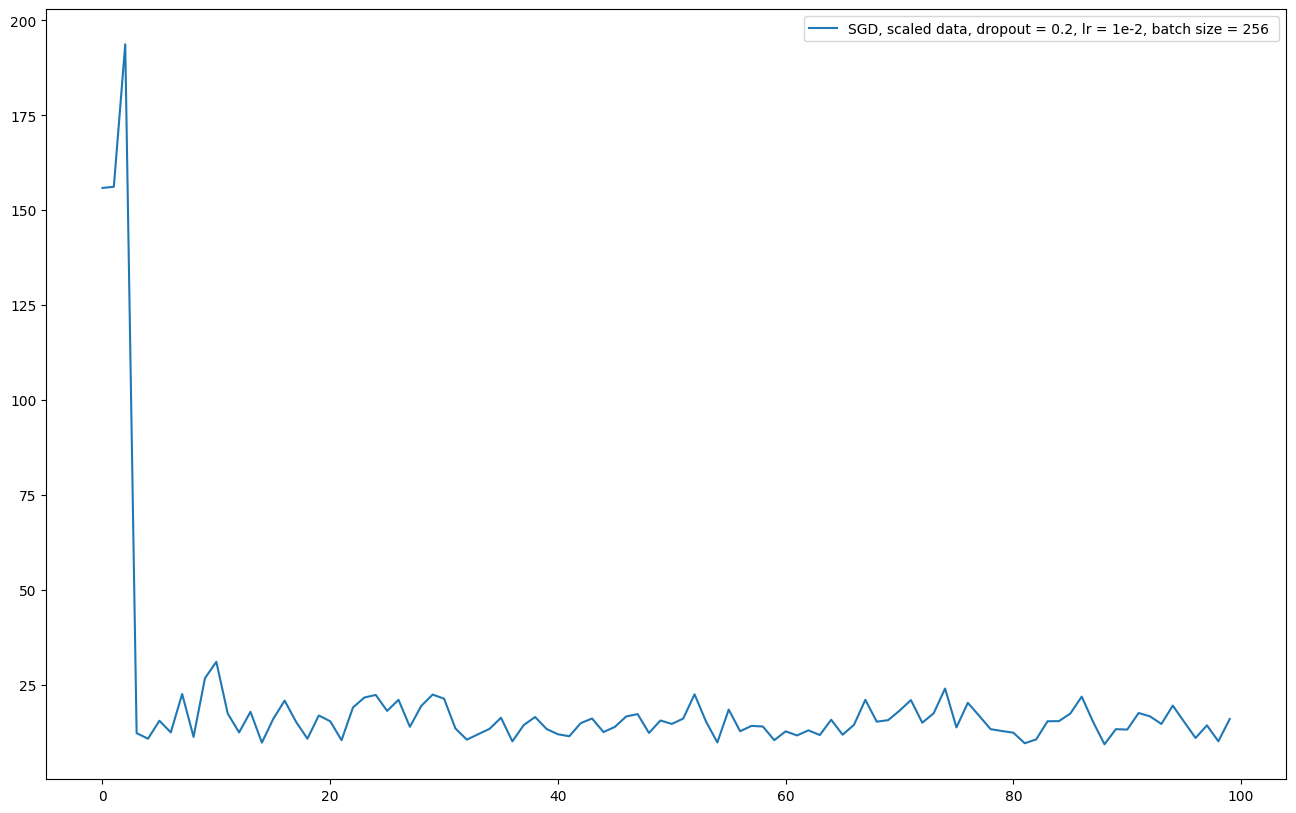

In [ ]:
plot([('SGD, scaled data, dropout = 0.2, lr = 1e-2, batch size = 256 ', valid_loss_values2)]) # ёшкин кот.......

## Эксперимент 3

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 256

In [ ]:
#train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

In [ ]:
class ThirdModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        #self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        #self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)


    def forward(self, x):
        x = self.act1(self.fc1(x))
        #x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        #x = self.dropout2(x)
        x = self.out(x)
        return x

как я рада это видеть после рмсе = 1997, я даже не могу выразить это словами

In [ ]:
model3 = ThirdModel()

adam = optim.Adam(model3.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values3 = run_train(model3, optimizer=adam, criterion=criterion)

EPOCH 0, train_loss: 139.60347469016153, valid_loss: 23.446385232528836


EPOCH 5, train_loss: 16.037654205663316, valid_loss: 17.069357857845798


EPOCH 10, train_loss: 14.533320724832564, valid_loss: 14.09899406149836


EPOCH 15, train_loss: 13.939430772074012, valid_loss: 12.3532713427402


EPOCH 20, train_loss: 13.213980858425957, valid_loss: 14.930834444442597


EPOCH 25, train_loss: 13.031038576930301, valid_loss: 12.167563424252048


EPOCH 30, train_loss: 12.516387417879589, valid_loss: 11.227810989512076


EPOCH 35, train_loss: 12.408964479206414, valid_loss: 11.960479514433606


EPOCH 40, train_loss: 11.962204756852543, valid_loss: 13.950365354519079


EPOCH 45, train_loss: 11.925838605457583, valid_loss: 10.919129253614066


EPOCH 50, train_loss: 11.527089802634636, valid_loss: 10.326242196677935


EPOCH 55, train_loss: 11.604242237987897, valid_loss: 11.365493920770023


EPOCH 60, train_loss: 11.434059901479591, valid_loss: 10.629160215358922


EPOCH 65, train_loss: 11.226615771552584, valid_loss: 10.18317984354378


EPOCH 70, train_loss: 11.133816611687868, valid_loss: 11.428961628734475


EPOCH 75, train_loss: 11.194632316004098, valid_loss: 10.618857209045109


EPOCH 80, train_loss: 11.067223552573333, valid_loss: 11.398665253478702


EPOCH 85, train_loss: 10.87671335064549, valid_loss: 13.555545783278966


EPOCH 90, train_loss: 10.883947052966153, valid_loss: 10.882325543035375


EPOCH 95, train_loss: 10.802230322597833, valid_loss: 11.98596196599526


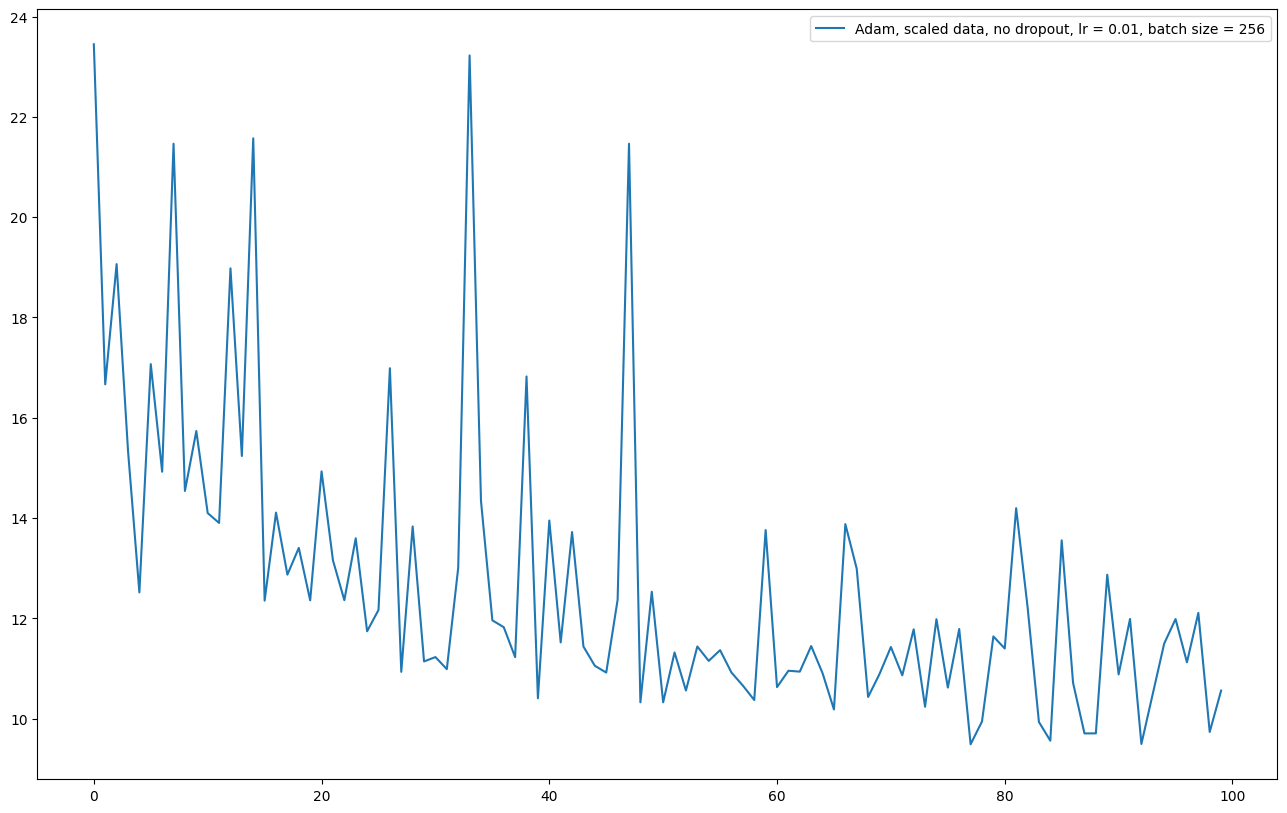

In [ ]:
plot([('Adam, scaled data, no dropout, lr = 0.01, batch size = 256', valid_loss_values3)])
 # блин вчера я запускала это же, и результат был 8.77 Т-Т либо я забыла и здесь изменила что-то, чего я не помню, либо это мистика..
 # это не мистика, кажется, тут я запустила с данными без масштабирования случайно, поэтому результат хуже, чем в прошлый раз
 # сама себя запутала))

## Эксперимент 4

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 128 # ДРУГОЕ плюс сгд

In [ ]:
class FourthModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        #self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.ReLU()
        #self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)

    def forward(self, x):
        x = self.act1(self.fc1(x))
        #x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        #x = self.dropout2(x)
        x = self.out(x)
        return x

In [ ]:
model4 = FourthModel()

sgd = optim.SGD(model4.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values4 = run_train(model4, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 489.11278330569235, valid_loss: 569.7672236980778


EPOCH 5, train_loss: 23.33633321273669, valid_loss: 23.494724490855


EPOCH 10, train_loss: 21.121379150196944, valid_loss: 21.76731720537242


EPOCH 15, train_loss: 20.568708596640075, valid_loss: 20.50738539554105


EPOCH 20, train_loss: 20.382597099076833, valid_loss: 20.4607352171794


EPOCH 25, train_loss: 20.350957206279762, valid_loss: 18.616716908936453


EPOCH 30, train_loss: 20.36215754376342, valid_loss: 19.783966116385884


EPOCH 35, train_loss: 20.317703570224854, valid_loss: 19.53001021394635


EPOCH 40, train_loss: 20.315762792465176, valid_loss: 19.932422038352136


EPOCH 45, train_loss: 20.304645072019127, valid_loss: 20.077269530532384


EPOCH 50, train_loss: 20.26853778767533, valid_loss: 20.53041654058022


EPOCH 55, train_loss: 20.242338915271212, valid_loss: 18.552128097798565


EPOCH 60, train_loss: 20.25033749439332, valid_loss: 18.083115341639754


EPOCH 65, train_loss: 20.24501470330009, valid_loss: 19.115712845679557


EPOCH 70, train_loss: 20.220189252436555, valid_loss: 20.43323244434772


EPOCH 75, train_loss: 20.190292280504508, valid_loss: 20.986916537332064


EPOCH 80, train_loss: 20.227020827876547, valid_loss: 21.18640391189273


EPOCH 85, train_loss: 20.197132691642306, valid_loss: 19.162750074178867


EPOCH 90, train_loss: 20.204976974470462, valid_loss: 21.04066268996437


EPOCH 95, train_loss: 20.21897840394616, valid_loss: 20.94138767695663


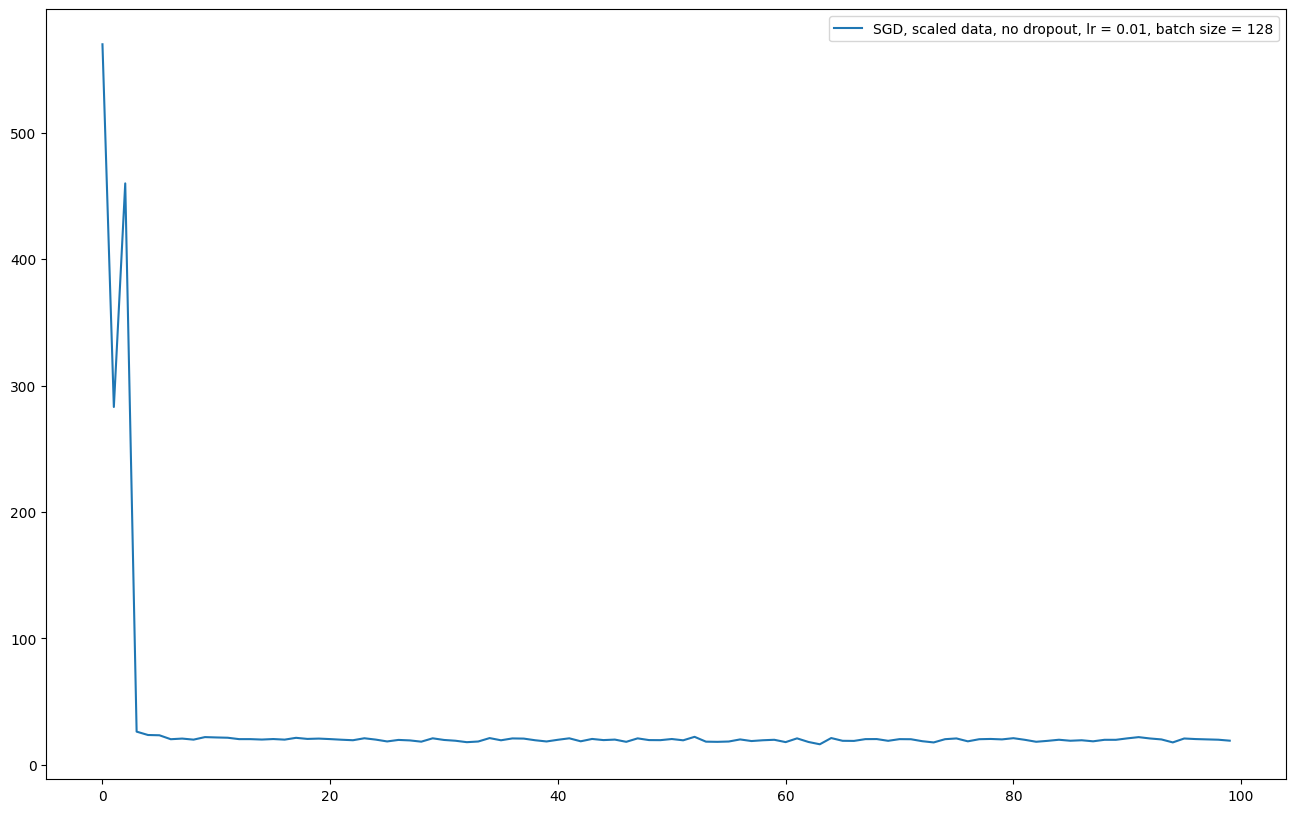

In [ ]:
plot([('SGD, scaled data, no dropout, lr = 0.01, batch size = 128', valid_loss_values4)])  # дааа что-то пошло не так...

## Эксперимент 4.5

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 0.1 # другое
EPOCHS = 100
BATCH_SIZE = 128

In [ ]:
class FourthandaHalfModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE)
        self.act1 = nn.ReLU()
        #self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.Sigmoid() # ДРУГОЕ
        #self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)


    def forward(self, x):
        x = self.act1(self.fc1(x))
        #x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        #x = self.dropout2(x)
        x = self.out(x)
        return x

In [ ]:
model45 = FourthandaHalfModel()

sgd = optim.SGD(model45.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values45 = run_train(model45, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 258.15732253097804, valid_loss: 8.955036229426318


EPOCH 5, train_loss: 8.866768125666688, valid_loss: 9.311092541949584


EPOCH 10, train_loss: 9.340478258417143, valid_loss: 8.992715800162589


EPOCH 15, train_loss: 9.217896451223766, valid_loss: 8.8551132513745


EPOCH 20, train_loss: 8.737123040174017, valid_loss: 8.548392461078002


EPOCH 25, train_loss: 8.684425274267891, valid_loss: 8.587881149631915


EPOCH 30, train_loss: 8.707092719625427, valid_loss: 8.583237416673414


EPOCH 35, train_loss: 8.637094123737175, valid_loss: 8.612205314164115


EPOCH 40, train_loss: 8.63127889038448, valid_loss: 8.562857233651794


EPOCH 45, train_loss: 8.62019093515594, valid_loss: 8.558791330545256


EPOCH 50, train_loss: 8.59207511500807, valid_loss: 8.847274565460658


EPOCH 55, train_loss: 8.603200441164686, valid_loss: 8.586958394192234


EPOCH 60, train_loss: 8.579966331686142, valid_loss: 8.590567168622915


EPOCH 65, train_loss: 8.593022768334311, valid_loss: 8.644447822381954


EPOCH 70, train_loss: 8.577211999208986, valid_loss: 8.598523491680032


EPOCH 75, train_loss: 8.586970955857115, valid_loss: 8.715693601287237


EPOCH 80, train_loss: 8.561385830506584, valid_loss: 8.576534216946895


EPOCH 85, train_loss: 8.562019365775928, valid_loss: 8.648166276440762


EPOCH 90, train_loss: 8.570976418112025, valid_loss: 8.563063234385877


EPOCH 95, train_loss: 8.564434304932096, valid_loss: 8.651817392594744


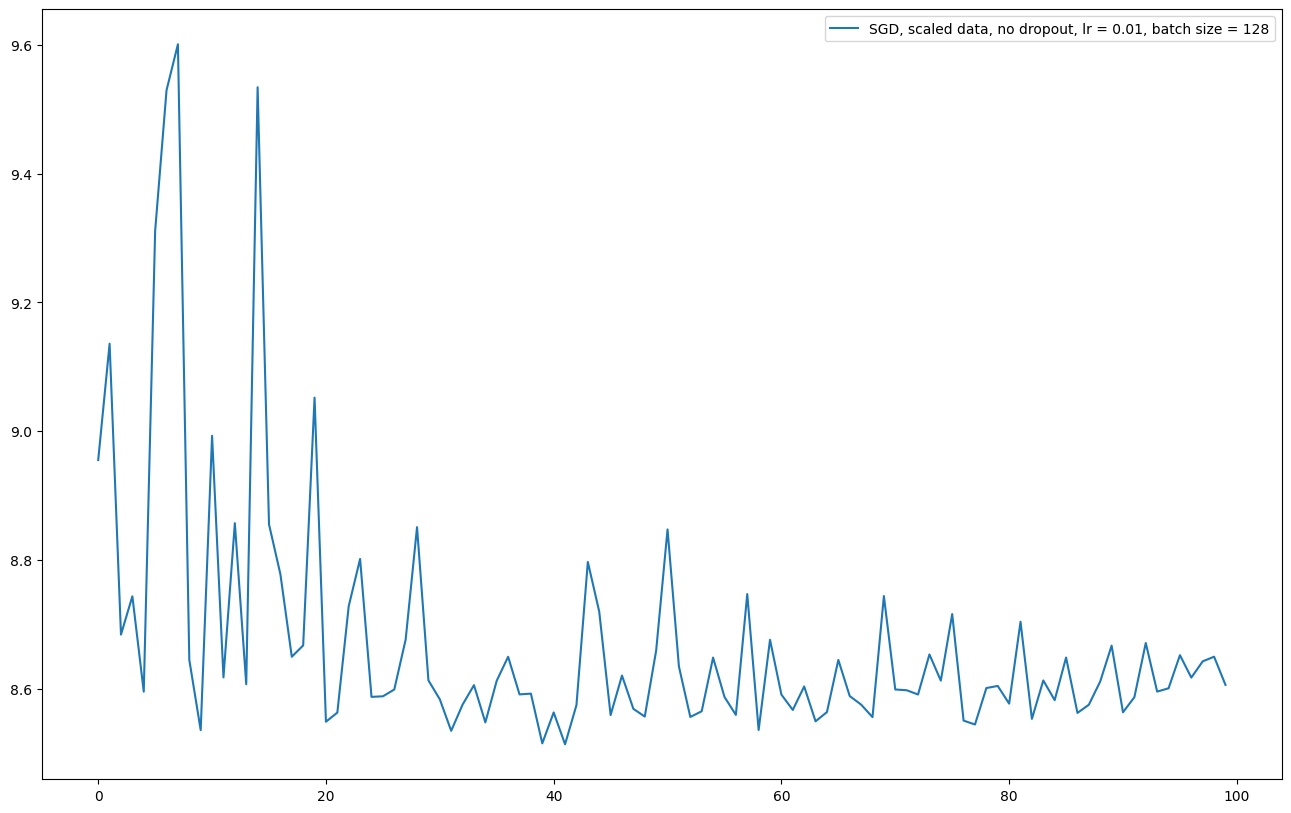

In [ ]:
plot([('SGD, scaled data, no dropout, lr = 0.1, batch size = 128', valid_loss_values45)])

## Эксперимент 4.5.1

In [ ]:
!nvidia-smi

Tue Nov 26 22:56:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
LEARNING_RATE = 0.01 # другое
EPOCHS = 60 # другое
BATCH_SIZE = 128

In [ ]:
class FourFiveOneModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE) # сохраняем слои
        self.act1 = nn.ReLU()
        #self.dropout1 = nn.Dropout(0.2) # один после первого
        self.fc2 = nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE)
        self.act2 = nn.Sigmoid() # ДРУГОЕ
        #self.dropout2 = nn.Dropout(0.2) # один после второго
        self.out = nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE)


    def forward(self, x):
        x = self.act1(self.fc1(x))
        #x = self.dropout1(x)
        x = self.act2(self.fc2(x))
        #x = self.dropout2(x)
        x = self.out(x)
        return x

In [ ]:
model451 = FourFiveOneModel()

sgd = optim.SGD(model451.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values451 = run_train(model451, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 1623.7591685448788, valid_loss: 1208.1026556940362


EPOCH 5, train_loss: 9.686514109965191, valid_loss: 8.699191992825801


EPOCH 10, train_loss: 8.792380190053523, valid_loss: 8.611370348694301


EPOCH 15, train_loss: 8.70637309498608, valid_loss: 8.534818335334853


EPOCH 20, train_loss: 8.655932646976664, valid_loss: 8.586097419852077


EPOCH 25, train_loss: 8.621137361652803, valid_loss: 8.574251845331474


EPOCH 30, train_loss: 8.58730313241087, valid_loss: 8.76641301589437


EPOCH 35, train_loss: 8.571255636267841, valid_loss: 8.578531458826347


EPOCH 40, train_loss: 8.553180676948681, valid_loss: 8.512475929637947


EPOCH 45, train_loss: 8.541734625961606, valid_loss: 8.537145095296426


EPOCH 50, train_loss: 8.527549249973255, valid_loss: 8.54995615883629


EPOCH 55, train_loss: 8.51637880165319, valid_loss: 8.52718715148397


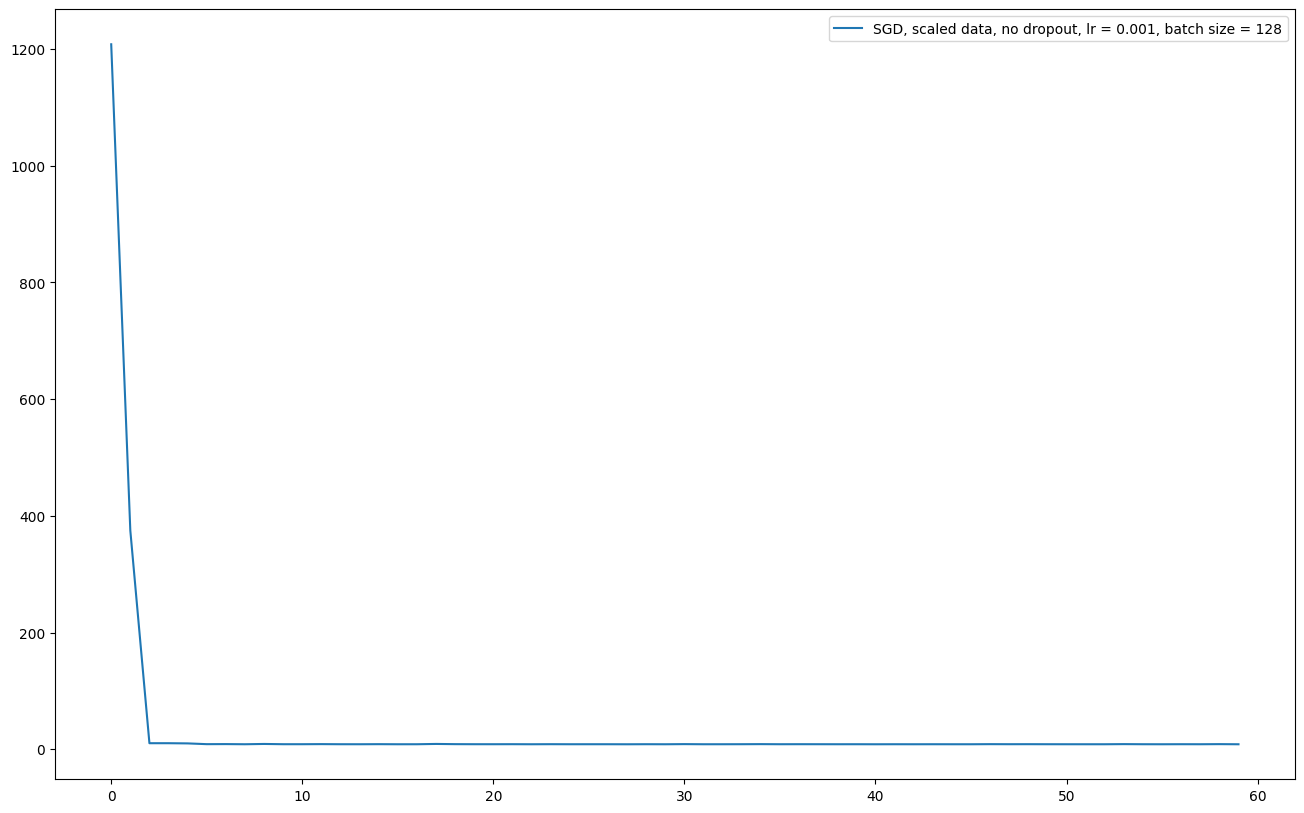

In [ ]:
plot([('SGD, scaled data, no dropout, lr = 0.001, batch size = 128', valid_loss_values451)])

## Эксперимент 5

In [10]:
INPUT_SIZE = 90
HIDDEN_SIZE = 45
OUTPUT_SIZE = 1
#LEARNING_RATE = 0.01 # другое 0.001
LEARNING_RATE = 0.005 # другое
EPOCHS = 60 # другое
BATCH_SIZE = 128

In [15]:
class FifthModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_SIZE, HIDDEN_SIZE)
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE)  # BatchNorm после линейного слоя
        self.act1 = nn.ReLU() # другое
        self.dropout1 = nn.Dropout(0.1) # другое

        self.fc2 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE)
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE)
        self.act2 = nn.ReLU() # другое
        #self.dropout2 = nn.Dropout(0.1) # когда я убрала второй дропаут стало лучше

        self.out = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)



    def forward(self, x):
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)         # активация после нормализации
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)         # тут ещё была сигмоида после 2й нормализации, но с релу было лучше
        #x = self.dropout2(x)
        x = self.out(x)
        return x


In [18]:
model5 = FifthModel()

adam = optim.Adam(model5.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values5 = run_train(model5, optimizer=adam, criterion=criterion)

EPOCH 0, train_loss: 318.75545341903387, valid_loss: 15.343808831554828


EPOCH 5, train_loss: 9.320923914607967, valid_loss: 8.407680188665296


EPOCH 10, train_loss: 9.115212825724607, valid_loss: 8.739851965172456


EPOCH 15, train_loss: 9.03152658621514, valid_loss: 8.249501323936009


EPOCH 20, train_loss: 9.004490969360713, valid_loss: 8.29163240973312


EPOCH 25, train_loss: 8.984717007404594, valid_loss: 8.27807593463671


EPOCH 30, train_loss: 8.973539194611927, valid_loss: 8.364520276537036


EPOCH 35, train_loss: 8.966247254565642, valid_loss: 8.261814840359262


EPOCH 40, train_loss: 8.958401029161942, valid_loss: 8.55122978616469


EPOCH 45, train_loss: 8.950881517232864, valid_loss: 8.287391580567501


EPOCH 50, train_loss: 8.941306307405982, valid_loss: 8.336926793698037


EPOCH 55, train_loss: 8.933792121364963, valid_loss: 8.34379086577066


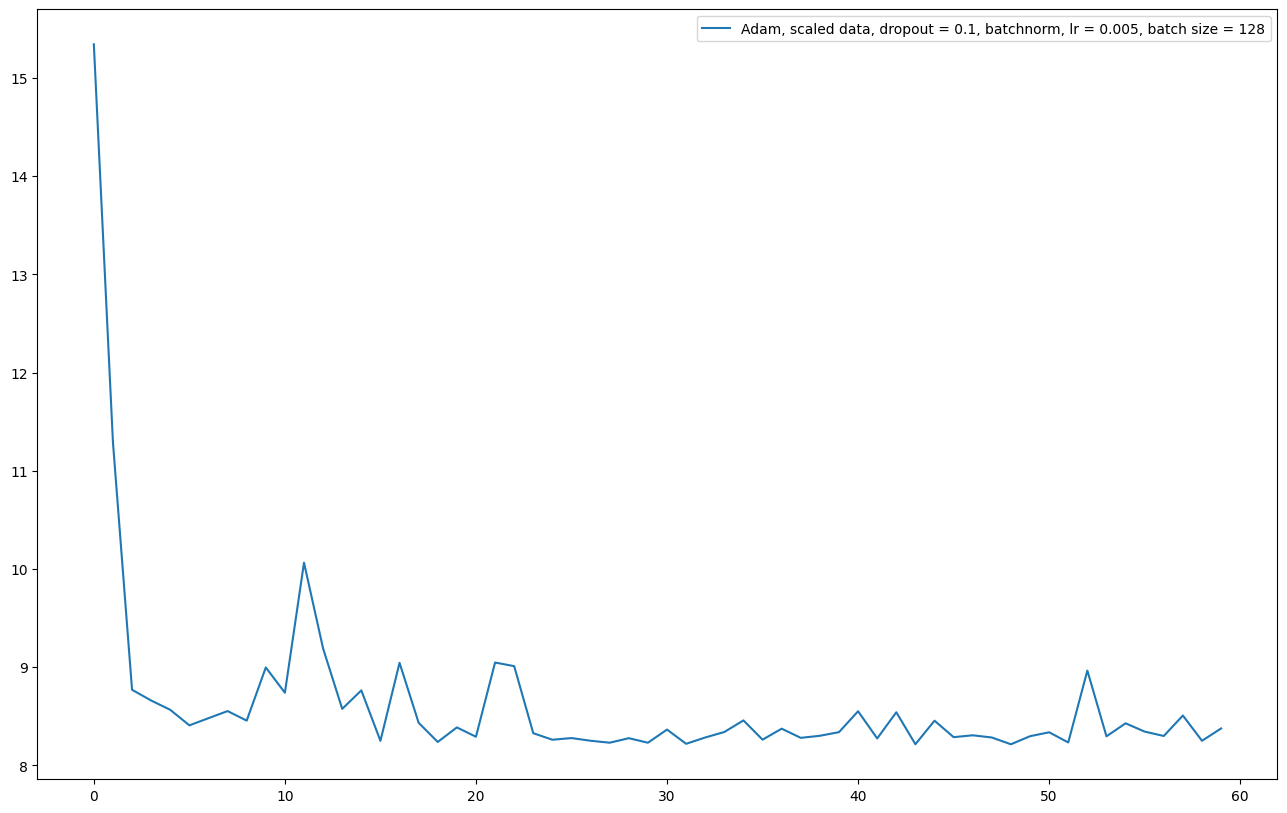

In [19]:
plot([('Adam, scaled data, dropout = 0.1, batchnorm, lr = 0.005, batch size = 128', valid_loss_values5)])

## Эксперимент 5.1

In [20]:
model51 = FifthModel()

sgd = optim.SGD(model51.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values51 = run_train(model51, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 418.5570361979456, valid_loss: 9.325527235422983


EPOCH 5, train_loss: 10.02243441006047, valid_loss: 12.218885169170871


EPOCH 10, train_loss: 9.950482225141702, valid_loss: 9.625098712373488


EPOCH 15, train_loss: 9.896178683687106, valid_loss: 8.20393707256506


EPOCH 20, train_loss: 9.940392736766077, valid_loss: 9.368384267434035


EPOCH 25, train_loss: 9.867560896661576, valid_loss: 9.527298460502436


EPOCH 30, train_loss: 9.922073169864083, valid_loss: 10.662400460479283


EPOCH 35, train_loss: 9.940686134156225, valid_loss: 8.79464328407061


EPOCH 40, train_loss: 9.893407879697003, valid_loss: 8.795797223501866


EPOCH 45, train_loss: 9.910054107742878, valid_loss: 9.666038906220162


EPOCH 50, train_loss: 9.912585770198728, valid_loss: 10.268355399075121


EPOCH 55, train_loss: 9.950255606406767, valid_loss: 8.292144503923925


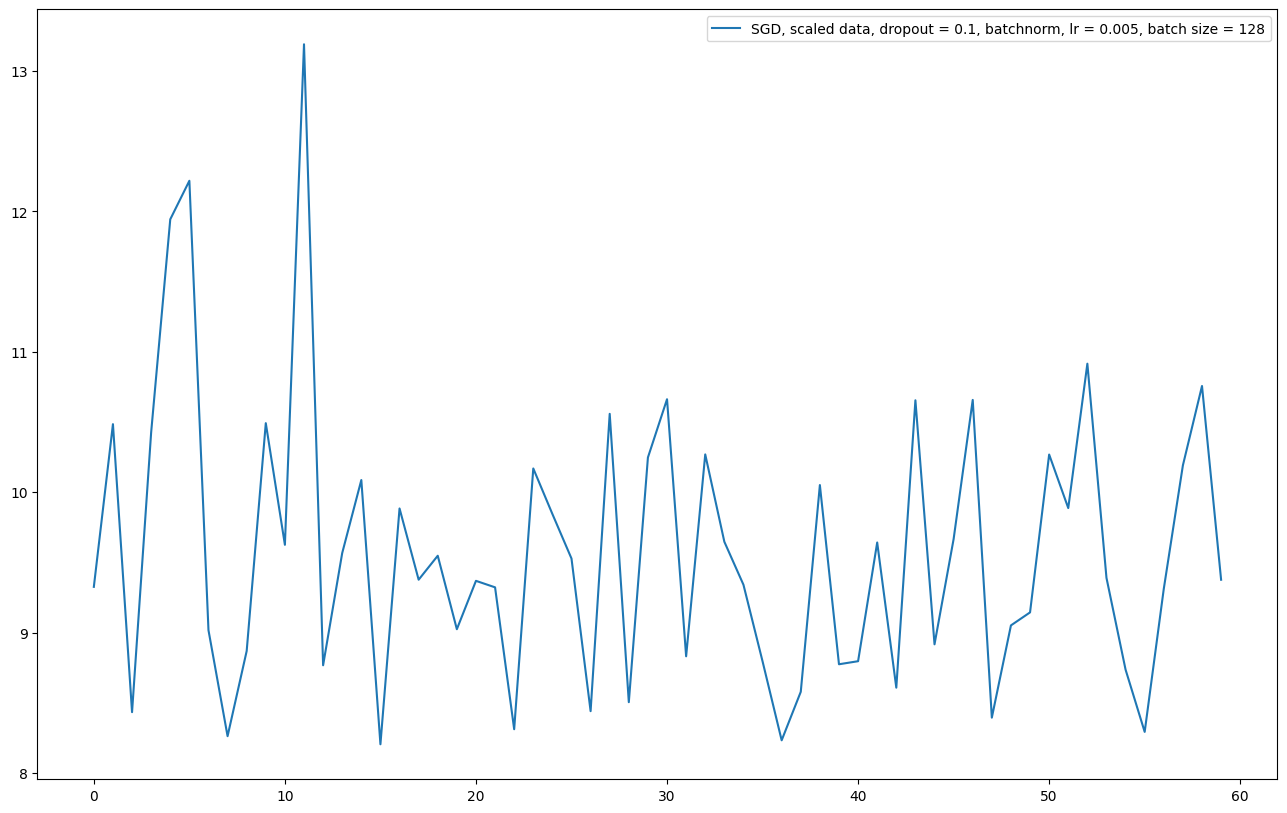

In [22]:
plot([('SGD, scaled data, dropout = 0.1, batchnorm, lr = 0.005, batch size = 128', valid_loss_values51)])

## Эксперимент 5.2

In [21]:
model52 = FifthModel()

sgd = optim.SGD(model52.parameters(), lr=LEARNING_RATE, momentum=0.9, nesterov=True)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values52 = run_train(model52, optimizer=sgd, criterion=criterion)

EPOCH 0, train_loss: 70.16873686082647, valid_loss: 14.924481304565278


EPOCH 5, train_loss: 14.582096196721345, valid_loss: 15.119916696359615


EPOCH 10, train_loss: 14.54001022010359, valid_loss: 14.679794945339165


EPOCH 15, train_loss: 14.555882924306534, valid_loss: 16.66768800622166


EPOCH 20, train_loss: 14.536834959229678, valid_loss: 13.15437103025984


EPOCH 25, train_loss: 14.504411088805023, valid_loss: 13.231569098954154


EPOCH 30, train_loss: 14.539986773877061, valid_loss: 12.077739808819082


EPOCH 35, train_loss: 14.49471156083185, valid_loss: 15.175854258017965


EPOCH 40, train_loss: 14.47348173343112, valid_loss: 14.295424911055234


EPOCH 45, train_loss: 14.471282126394847, valid_loss: 12.450619808518061


EPOCH 50, train_loss: 14.502005989170522, valid_loss: 13.022822552388257


EPOCH 55, train_loss: 14.451404192485173, valid_loss: 12.945121991752398


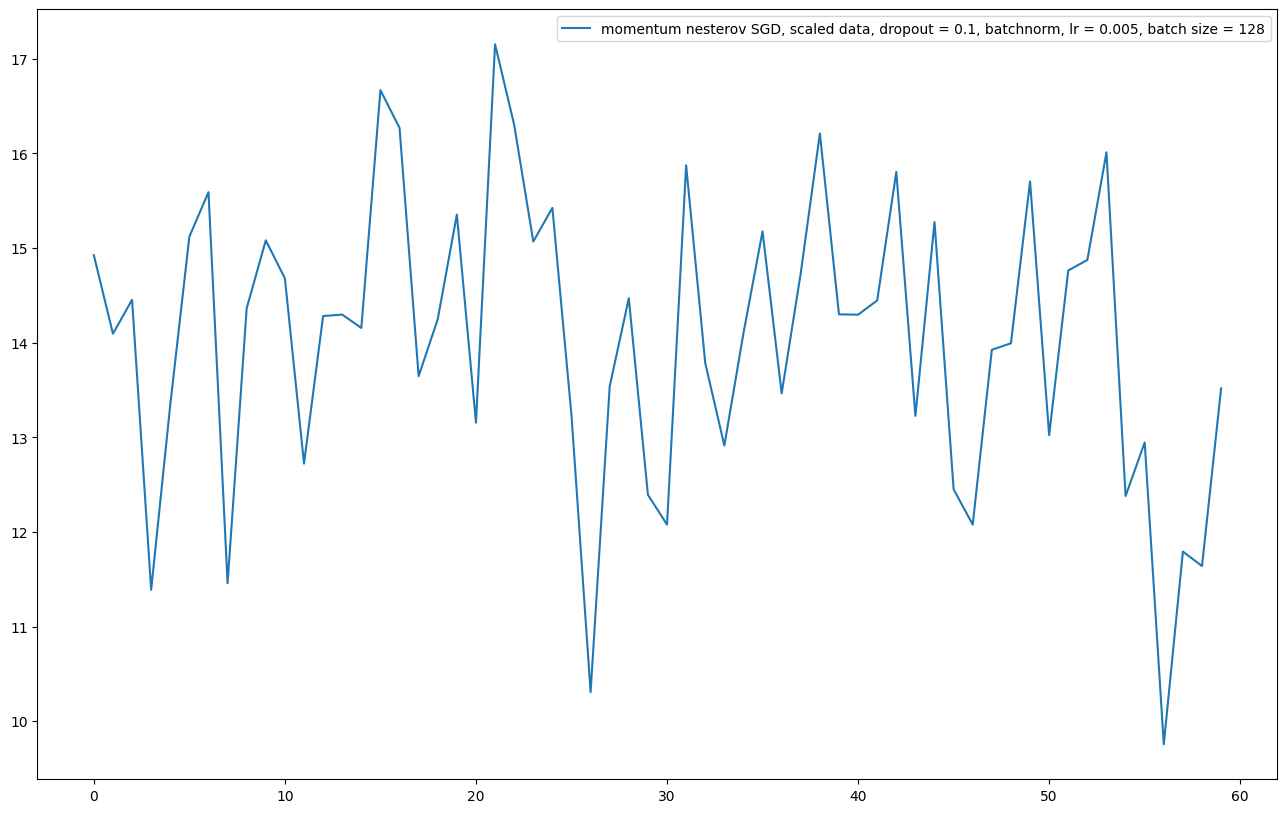

In [23]:
plot([('momentum nesterov SGD, scaled data, dropout = 0.1, batchnorm, lr = 0.005, batch size = 128', valid_loss_values52)])

## Эксперимент 5.3

In [24]:
model53 = FifthModel()

rmsprop = optim.RMSprop(model53.parameters(), lr=LEARNING_RATE, alpha=0.9, eps=1e-08) # альфа это коэфф затухания

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values53 = run_train(model53, optimizer=rmsprop, criterion=criterion)

EPOCH 0, train_loss: 454.2763399692191, valid_loss: 30.195322808652822


EPOCH 5, train_loss: 9.51493263652632, valid_loss: 8.760079582138816


EPOCH 10, train_loss: 9.363448826871194, valid_loss: 8.7302219430999


EPOCH 15, train_loss: 9.305274268457516, valid_loss: 8.51226107141759


EPOCH 20, train_loss: 9.21196767555361, valid_loss: 8.708347434454625


EPOCH 25, train_loss: 9.135985175582082, valid_loss: 8.320879665341709


EPOCH 30, train_loss: 9.11698413401916, valid_loss: 8.373459512644475


EPOCH 35, train_loss: 9.08695448441891, valid_loss: 8.923876785405792


EPOCH 40, train_loss: 9.073920288501837, valid_loss: 8.514053956706926


EPOCH 45, train_loss: 9.062217178839594, valid_loss: 8.436398288401046


EPOCH 50, train_loss: 9.05318930818335, valid_loss: 8.661600916102381


EPOCH 55, train_loss: 9.037998434525315, valid_loss: 8.310913483695229


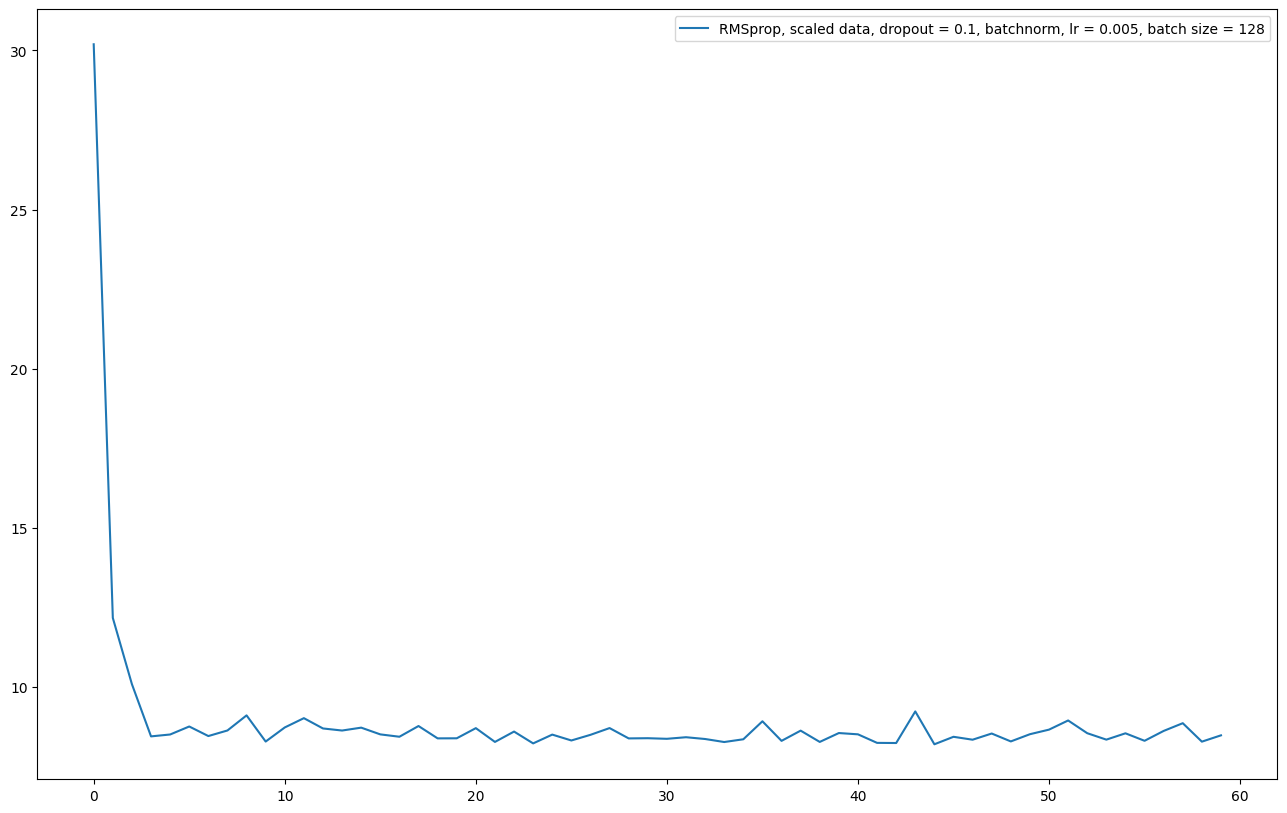

In [25]:
plot([('RMSprop, scaled data, dropout = 0.1, batchnorm, lr = 0.005, batch size = 128', valid_loss_values53)])

## Эксперимент 5.4

In [16]:
from torch.optim.lr_scheduler import MultiStepLR

In [20]:
LEARNING_RATE = 0.1

In [21]:
model54 = FifthModel()

adam = optim.Adam(model54.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

scheduler = MultiStepLR(adam, milestones=[30, 50], gamma=0.1)

# запускаем процесс обучения
train_loss_values, valid_loss_values54 = run_train(model54, optimizer=adam, criterion=criterion, scheduler=scheduler)

EPOCH 0, train_loss: 33.5328038315927, valid_loss: 10.675169643789236


EPOCH 5, train_loss: 9.975776395447637, valid_loss: 8.827402224635133


EPOCH 10, train_loss: 9.91680085866319, valid_loss: 8.669167488518328


EPOCH 15, train_loss: 9.909347976797232, valid_loss: 12.368640449967716


EPOCH 20, train_loss: 9.839253829257975, valid_loss: 8.82970779189969


EPOCH 25, train_loss: 9.655760034486926, valid_loss: 8.957876832178323


EPOCH 30, train_loss: 8.95059872384299, valid_loss: 8.423474139506274


EPOCH 35, train_loss: 8.955273479379542, valid_loss: 8.206993628256392


EPOCH 40, train_loss: 8.95475389218416, valid_loss: 8.33568009645632


EPOCH 45, train_loss: 8.954781790119227, valid_loss: 8.318504813283976


EPOCH 50, train_loss: 8.839364980881365, valid_loss: 8.205763423796927


EPOCH 55, train_loss: 8.845273452604012, valid_loss: 8.35046252106676


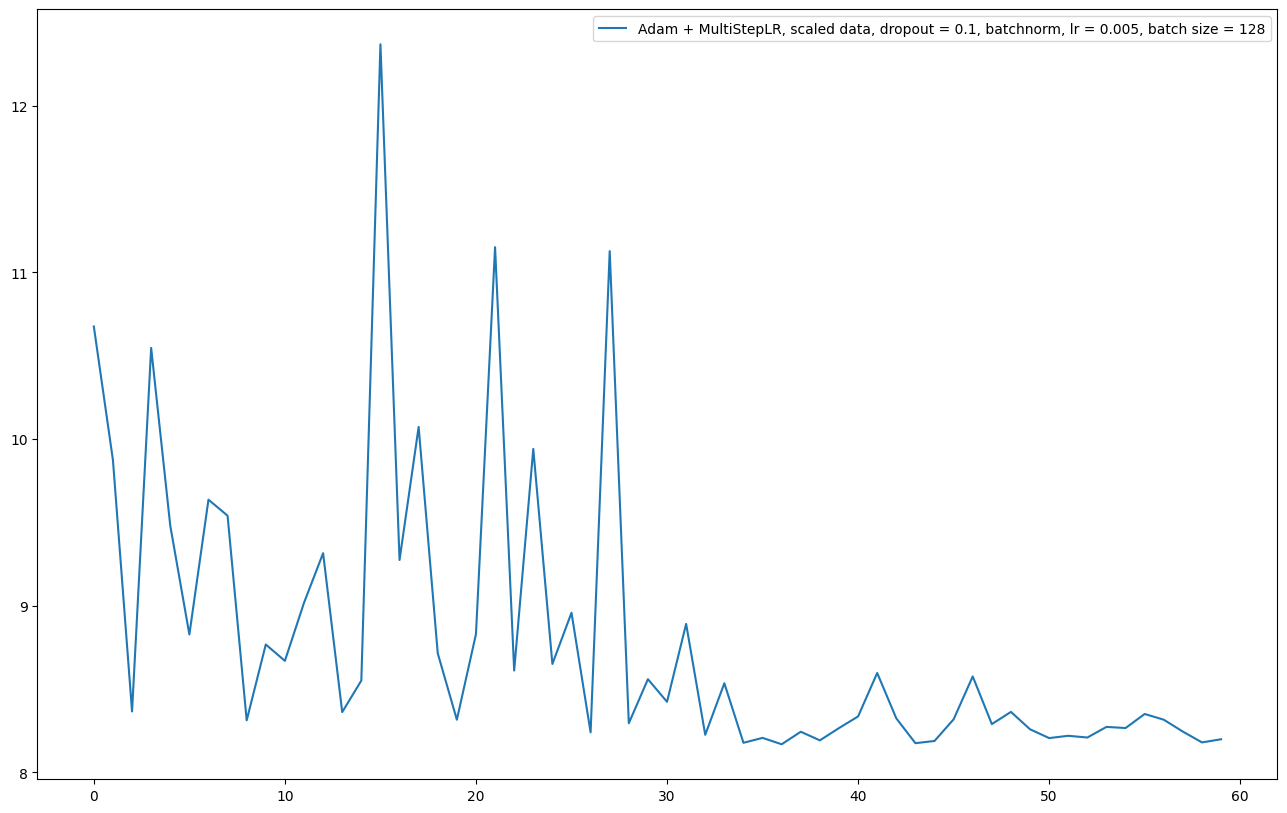

In [22]:
plot([('Adam + MultiStepLR, scaled data, dropout = 0.1, batchnorm, lr = 0.005, batch size = 128', valid_loss_values54)])

## Эксперимент 6

In [26]:
INPUT_SIZE = 90
HIDDEN_SIZE = 120
HIDDEN_SIZE1 = 60
HIDDEN_SIZE2 = 30
OUTPUT_SIZE = 1
#LEARNING_RATE = 0.01 # другое 0.001
LEARNING_RATE = 0.005
EPOCHS = 80 # другое
BATCH_SIZE = 128

In [27]:
train_loader, test_loader = create_data_loader(X_train_scaled, y_train, X_test_scaled, y_test)

In [32]:
class SixthModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_SIZE, HIDDEN_SIZE) # 90 -> 120 нейронов
        self.batchnorm1 = nn.BatchNorm1d(HIDDEN_SIZE)  # 120
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)

        self.fc2 = nn.Linear(HIDDEN_SIZE, HIDDEN_SIZE1) # 120 -> 60
        self.batchnorm2 = nn.BatchNorm1d(HIDDEN_SIZE1) # 60
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.1)

        self.fc3 = nn.Linear(HIDDEN_SIZE1, HIDDEN_SIZE2) # 60 -> 30
        self.batchnorm3 = nn.BatchNorm1d(HIDDEN_SIZE2) # 30
        self.act3 = nn.ReLU()

        self.out = nn.Linear(HIDDEN_SIZE2, OUTPUT_SIZE) # 30 -> 1


    def forward(self, x):
        x = self.fc1(x)
        x = self.batchnorm1(x)
        x = self.act1(x)         # активация после нормализации
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.batchnorm2(x)
        x = self.act2(x)
        x = self.dropout1(x)

        x = self.fc3(x)
        x = self.batchnorm3(x)
        x = self.act3(x)
        x = self.out(x)
        return x

In [33]:
model6 = SixthModel()

adam = optim.Adam(model6.parameters(), lr=LEARNING_RATE)

criterion = nn.MSELoss()

# запускаем процесс обучения
train_loss_values, valid_loss_values6 = run_train(model6, optimizer=adam, criterion=criterion)

EPOCH 0, train_loss: 375.0038813676026, valid_loss: 18.751471394359477


EPOCH 5, train_loss: 12.600006878458267, valid_loss: 9.495050443281041


EPOCH 10, train_loss: 9.507851159345567, valid_loss: 8.42170243098004


EPOCH 15, train_loss: 9.0749596882156, valid_loss: 8.236458069617205


EPOCH 20, train_loss: 8.993727813923915, valid_loss: 8.17765351038168


EPOCH 25, train_loss: 8.949215878579553, valid_loss: 8.222905978117838


EPOCH 30, train_loss: 8.907808748687989, valid_loss: 8.130476907928392


EPOCH 35, train_loss: 8.882478961686617, valid_loss: 8.19559105788127


EPOCH 40, train_loss: 8.87810708434747, valid_loss: 8.127611488989084


EPOCH 45, train_loss: 8.864432125765417, valid_loss: 8.195391933516701


EPOCH 50, train_loss: 8.85893080703731, valid_loss: 8.187036356713513


EPOCH 55, train_loss: 8.831424710370873, valid_loss: 8.151597574205681


EPOCH 60, train_loss: 8.8385628615497, valid_loss: 8.095949659843257


EPOCH 65, train_loss: 8.848822213061567, valid_loss: 8.385960741208331


EPOCH 70, train_loss: 8.828501063027568, valid_loss: 8.155307052159074


EPOCH 75, train_loss: 8.820703306679826, valid_loss: 8.145479646059545


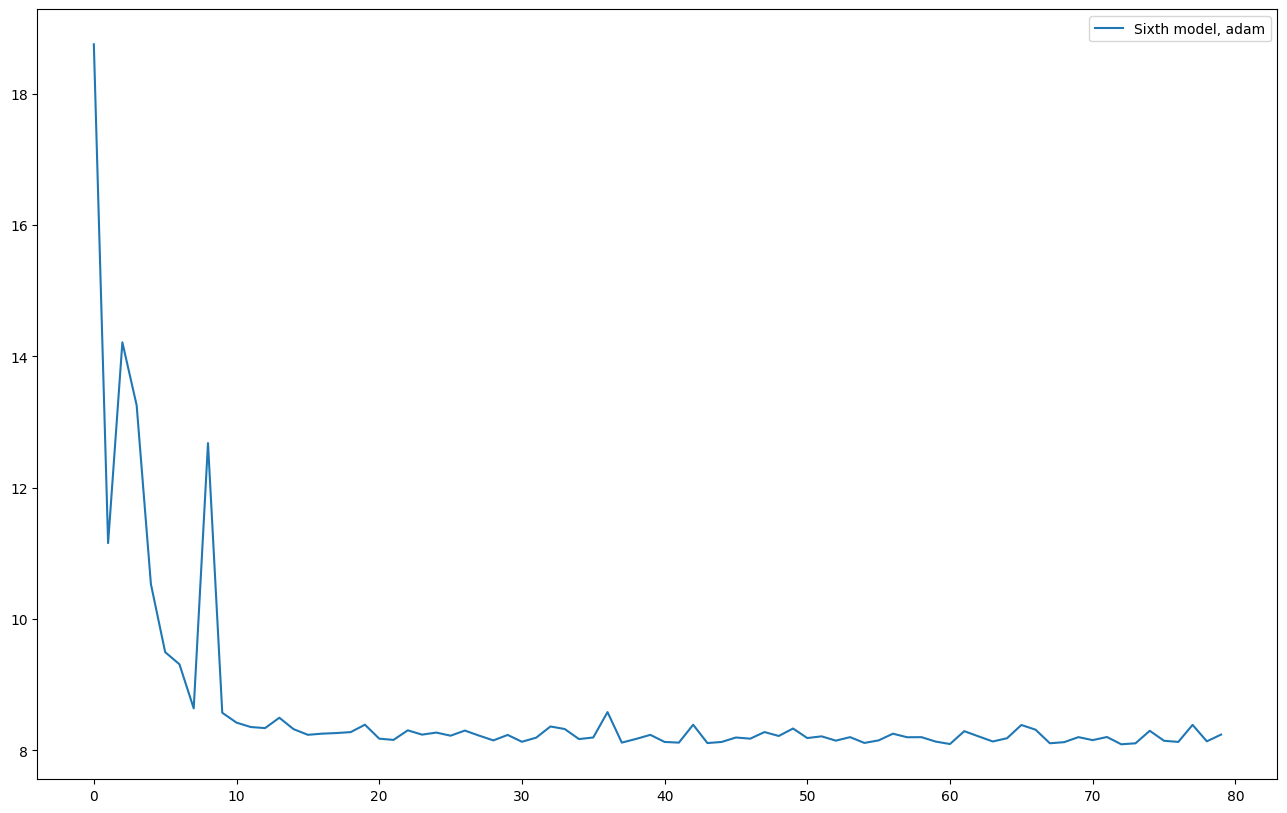

In [34]:
plot([('Sixth model, adam', valid_loss_values6)])

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

# Отчёт обо всём
Критерий везде естественно MSELoss, из которого вычисляется корень в трейнлупе -> RMSE.\
На некоторых графиках подписано не так, как на самом деле, а здесь вся правда.

### ПЕРВАЯ МОДЕЛЬ:
INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 1e-2\
EPOCHS = 100\
BATCH_SIZE = 256

optimizer = SGD

+ Архитектура: полносвязный слой (90 на вход, 45 на выход)-> ReLU -> dropout = 0.2 -> полносвязный слой (45 на вход, 45 на выход)-> ReLU -> dropout = 0.2 -> полносвязный слой (45 на вход, 1 на выход) -> сигмоида for good luck видимо))

(good luck она мне не принесла, потому что не нужна была там, потому что целевые значения не находятся в пределе от 0 до 1)

<u>Результат: RMSE = 1997, обучения практически не было, my fault</u>

### ВТОРАЯ МОДЕЛЬ:
INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 1e-2\
EPOCHS = 100\
BATCH_SIZE = 256

optimizer = SGD

+ масштабированные данные
+ архитектура как и в первой, только без сигмоиды

<u>Результат: RMSE = 15.23</u> было ~~переобучение~~ недообучение?? слишком сильная регуляризация?

### ТРЕТЬЯ МОДЕЛЬ:
INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 0.01 (я пишу это на следующий день и понимаю, что 1e-2 = 0.01 >_<, так что lr такое же..)\
EPOCHS = 100\
BATCH_SIZE = 256

optimizer = Adam

+ масштабированные данные (и во всех моделях далее тоже)
+ ~~другой~~ learning rate = 0.01
+ архитектура как во второй, но без дропаута

<u>Результат: RMSE = 10.18</u>

### ЧЕТВЁРТАЯ МОДЕЛЬ:

INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 0.01\
EPOCHS = 100\
BATCH_SIZE = 128

+ другой размер батча

Всё точно такое же, как в третьей, но оптимизатор = SGD

<u>Результат: RMSE = 18.08 (ну там было и 19, и 20, всякое)</u>

### ЧЕТВЁРТАЯ с половиной МОДЕЛЬ:

INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 0.1\
EPOCHS = 100\
BATCH_SIZE = 128

optimizer = SGD

+ другой learning rate = 0.1
+ Архитектура: полносвязный слой (90 на вход, 45 на выход)-> ReLU -> полносвязный слой (45 на вход, 45 на выход)-> Sigmoid -> полносвязный слой (45 на вход, 1 на выход)

<u>Результат: RMSE = 8.65 </u>

Здесь заметила, что вообще-то можно было сократить количество эпох наполовину

### МОДЕЛЬ 4.5.1:

INPUT_SIZE = 90\
HIDDEN_SIZE = 45\
OUTPUT_SIZE = 1\
LEARNING_RATE = 0.01\
EPOCHS = 60\
BATCH_SIZE = 128

optimizer = SGD

+ другой lr = 0.01, кол-во эпох понизила до 60
+ архитектура как в 4.5

<u>Результат: RMSE = 8.52 </u>

### ПЯТАЯ МОДЕЛЬ:

LEARNING_RATE = 0.005

optimizer = Adam

+ другой lr
+ Архитектура: полносвязный слой (90 на вход, 45 на выход)-> BatchNorm -> ReLU -> dropout = 0.1 -> полносвязный слой (45 на вход, 45 на выход)-> BatchNorm -> ReLU -> полносвязный слой (45 на вход, 1 на выход)

Пробовала lr = 0.01 и lr = 0.001, но результаты были лучше, когда попробовала lr = 0.005.\
Ещё пробовала дропаут ставить и после первого полносвязного слоя, и после второго, и значение = 0.2, но лучший вариант был, когда я установила дропаут = 0.1, и оставила его только после первого слоя.

На трейне лосс падал стабильно.

<u>Результат: RMSE = 8.34 </u>

### 5.1 МОДЕЛЬ:
Всё то же самое, что и в 5 модели, но optimizer = SGD.\
Было не очень, всё слишком скакало туда сюда.

<u>Результат: RMSE = 8.29 (но там разброс) </u>

### 5.2 МОДЕЛЬ:
Всё то же самое, что и в 5 модели, но optimizer = momentum nesterov SGD.\
Здесь что-то пошло не так. Что-то с чем-то не сочетается.

<u>Результат: RMSE = 12.94 </u>

### 5.3 МОДЕЛЬ:
Всё то же самое, что и в 5 модели, но optimizer = RMSprop.\
На трейне лосс стабильно падал. Результат немного улучшился.

<u>Результат: RMSE = 8.31</u>

### 5.4 МОДЕЛЬ:
LEARNING_RATE = 0.1

Всё то же самое, что и в 5 модели, но с понижением lr с помощью MultiStepLR

<u>Результат: RMSE = 8.20 (на 50 эпохе)</u>

### 6 МОДЕЛЬ:
Решила ещё поэкспериментировать...\
INPUT_SIZE = 90\
HIDDEN_SIZE = 120\
HIDDEN_SIZE1 = 60\
HIDDEN_SIZE2 = 30\
OUTPUT_SIZE = 1\
LEARNING_RATE = 0.005\
EPOCHS = 80\
BATCH_SIZE = 128

optimizer = Adam

+ Архитектура: полносвязный слой (90 на вход, 120 на выход)-> BatchNorm -> ReLU -> dropout = 0.1 -> полносвязный слой (120 на вход, 60 на выход)-> BatchNorm -> ReLU ->  dropout = 0.1 -> полносвязный слой (60 на вход, 30 на выход) -> BatchNorm -> ReLU -> полносвязный слой (30 на вход, 1 на выход)

<u>Результат: RMSE = 8.14 (на 60 эпохе дошло даже до 8.09!)</u>

## Общие выводы, итог, мысли...
Лучшие модели:
+ 5.4 (RMSE = 8.35)
+ 5 (RMSE = 8.34)
+ 5.3 (RMSE = 8.31)
+ 6 (RMSE = 8.14)

Лучший оптимизатор был Adam, дропаут помог(когда его было немножко), ещё стало лучше, когда уменьшила размер батча, ну и, конечно, масштабирование данных помогло очень. В 6 модели не знаю, что повлияло на качество больше всего, я там просто решила на скрытом слое сделать наоборот больше нейронов, может это, может не это, может всё сразу.

Что ещё можно было попробовать, чего я тут не пробовала:
+ другое кол-во нейронов и слоёв
+ другие функции активации
+ другой способ масштабирования (я использовала только StandardScaler)
+ другие scheduler-ы
+ другие оптимизаторы
+ более оптимальный подбор learning rate

На самом деле столько сочетаний всего со всем, сложно остановиться :)